In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 26

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
12/18 [===================>..........] - ETA: 0s - loss: 3.3333 - accuracy: 0.0417 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 3s 50ms/step - loss: 3.3200 - accuracy: 0.0407 - val_loss: 3.2649 - val_accuracy: 0.0366
Epoch 2/1000
11/18 [=================>............] - ETA: 0s - loss: 3.2853 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 3.2704 - accuracy: 0.0479 - val_loss: 3.2375 - val_accuracy: 0.0528
Epoch 3/1000
12/18 [===================>..........] - ETA: 0s - loss: 3.2415 - accuracy: 0.0462
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 3.2378 - accuracy: 0.0493 - val_loss: 3.2199 - val_accuracy: 0.0935
Epoch 4/1000
10/18 [===============>..............] - ETA: 0s - loss: 3.2298 - accuracy: 0.05

 8/18 [============>.................] - ETA: 0s - loss: 2.4572 - accuracy: 0.1973
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 20ms/step - loss: 2.4963 - accuracy: 0.1898 - val_loss: 2.3216 - val_accuracy: 0.2913
Epoch 29/1000
16/18 [=========================>....] - ETA: 0s - loss: 2.4522 - accuracy: 0.1929
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 21ms/step - loss: 2.4504 - accuracy: 0.1939 - val_loss: 2.2814 - val_accuracy: 0.3306
Epoch 30/1000
15/18 [========================>.....] - ETA: 0s - loss: 2.4576 - accuracy: 0.1984
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 22ms/step - loss: 2.4488 - accuracy: 0.2006 - val_loss: 2.2515 - val_accuracy: 0.3388
Epoch 31/1000
17/18 [===========================>..] - ETA: 0s - loss: 2.4510 - accuracy: 0.1926
Epoch

Epoch 55/1000
18/18 [==============================] - ETA: 0s - loss: 2.1192 - accuracy: 0.2802
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 20ms/step - loss: 2.1192 - accuracy: 0.2802 - val_loss: 1.7681 - val_accuracy: 0.4350
Epoch 56/1000
17/18 [===========================>..] - ETA: 0s - loss: 2.1423 - accuracy: 0.2638
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 20ms/step - loss: 2.1390 - accuracy: 0.2643 - val_loss: 1.7614 - val_accuracy: 0.4485
Epoch 57/1000
10/18 [===============>..............] - ETA: 0s - loss: 2.1150 - accuracy: 0.2930
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 20ms/step - loss: 2.1112 - accuracy: 0.2883 - val_loss: 1.7539 - val_accuracy: 0.4390
Epoch 58/1000
10/18 [===============>..............] - ETA: 0s - loss: 2.1364 - accuracy

Epoch 82/1000
10/18 [===============>..............] - ETA: 0s - loss: 2.0061 - accuracy: 0.2992
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 19ms/step - loss: 2.0115 - accuracy: 0.2982 - val_loss: 1.5819 - val_accuracy: 0.5149
Epoch 83/1000
11/18 [=================>............] - ETA: 0s - loss: 1.9918 - accuracy: 0.3118
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 19ms/step - loss: 2.0010 - accuracy: 0.3023 - val_loss: 1.5748 - val_accuracy: 0.5041
Epoch 84/1000
15/18 [========================>.....] - ETA: 0s - loss: 1.9988 - accuracy: 0.3047
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 21ms/step - loss: 1.9996 - accuracy: 0.3095 - val_loss: 1.5743 - val_accuracy: 0.4986
Epoch 85/1000
14/18 [======================>.......] - ETA: 0s - loss: 1.9954 - accuracy

Epoch 109/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.8923 - accuracy: 0.3542
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.9080 - accuracy: 0.3412 - val_loss: 1.4947 - val_accuracy: 0.4932
Epoch 110/1000
18/18 [==============================] - ETA: 0s - loss: 1.9262 - accuracy: 0.3263
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.9262 - accuracy: 0.3263 - val_loss: 1.4871 - val_accuracy: 0.5068
Epoch 111/1000
16/18 [=========================>....] - ETA: 0s - loss: 1.9283 - accuracy: 0.3247
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 19ms/step - loss: 1.9258 - accuracy: 0.3240 - val_loss: 1.4833 - val_accuracy: 0.4986
Epoch 112/1000
16/18 [=========================>....] - ETA: 0s - loss: 1.9793 - a

Epoch 136/1000
11/18 [=================>............] - ETA: 0s - loss: 1.8560 - accuracy: 0.3615
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.8770 - accuracy: 0.3543 - val_loss: 1.4232 - val_accuracy: 0.5285
Epoch 137/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.8817 - accuracy: 0.3297
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.8816 - accuracy: 0.3389 - val_loss: 1.4318 - val_accuracy: 0.5271
Epoch 138/1000
15/18 [========================>.....] - ETA: 0s - loss: 1.8685 - accuracy: 0.3349
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.8725 - accuracy: 0.3344 - val_loss: 1.4280 - val_accuracy: 0.5325
Epoch 139/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.8870 - a

Epoch 163/1000
11/18 [=================>............] - ETA: 0s - loss: 1.8074 - accuracy: 0.3572
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.8085 - accuracy: 0.3615 - val_loss: 1.3655 - val_accuracy: 0.5528
Epoch 164/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.8331 - accuracy: 0.3503
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.8349 - accuracy: 0.3565 - val_loss: 1.3717 - val_accuracy: 0.5379
Epoch 165/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.8172 - accuracy: 0.3444
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 13ms/step - loss: 1.8229 - accuracy: 0.3416 - val_loss: 1.3642 - val_accuracy: 0.5542
Epoch 166/1000
15/18 [========================>.....] - ETA: 0s - loss: 1.7918 - a

Epoch 190/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.7741 - accuracy: 0.3859
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.7846 - accuracy: 0.3796 - val_loss: 1.3108 - val_accuracy: 0.5854
Epoch 191/1000
13/18 [====================>.........] - ETA: 0s - loss: 1.7646 - accuracy: 0.3792
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.7677 - accuracy: 0.3805 - val_loss: 1.3036 - val_accuracy: 0.5949
Epoch 192/1000
11/18 [=================>............] - ETA: 0s - loss: 1.7833 - accuracy: 0.3636
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 13ms/step - loss: 1.7869 - accuracy: 0.3583 - val_loss: 1.2992 - val_accuracy: 0.5813
Epoch 193/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.7902 - a

Epoch 217/1000
13/18 [====================>.........] - ETA: 0s - loss: 1.7346 - accuracy: 0.3810
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 11ms/step - loss: 1.7293 - accuracy: 0.3800 - val_loss: 1.2498 - val_accuracy: 0.6098
Epoch 218/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.7166 - accuracy: 0.3743
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.7222 - accuracy: 0.3755 - val_loss: 1.2513 - val_accuracy: 0.6192
Epoch 219/1000
15/18 [========================>.....] - ETA: 0s - loss: 1.7297 - accuracy: 0.3927
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 13ms/step - loss: 1.7322 - accuracy: 0.3918 - val_loss: 1.2476 - val_accuracy: 0.6152
Epoch 220/1000
11/18 [=================>............] - ETA: 0s - loss: 1.7114 - a

Epoch 244/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6887 - accuracy: 0.3977
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.6954 - accuracy: 0.4035 - val_loss: 1.1999 - val_accuracy: 0.6396
Epoch 245/1000
13/18 [====================>.........] - ETA: 0s - loss: 1.6952 - accuracy: 0.4008
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 17ms/step - loss: 1.7063 - accuracy: 0.3986 - val_loss: 1.2091 - val_accuracy: 0.6341
Epoch 246/1000
14/18 [======================>.......] - ETA: 0s - loss: 1.6945 - accuracy: 0.3945
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.6925 - accuracy: 0.3936 - val_loss: 1.2195 - val_accuracy: 0.6206
Epoch 247/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.7174 - a

Epoch 271/1000
17/18 [===========================>..] - ETA: 0s - loss: 1.6670 - accuracy: 0.4067
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.6690 - accuracy: 0.4062 - val_loss: 1.1758 - val_accuracy: 0.6531
Epoch 272/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.6724 - accuracy: 0.4141
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.6833 - accuracy: 0.4175 - val_loss: 1.1740 - val_accuracy: 0.6640
Epoch 273/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6251 - accuracy: 0.4332
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.6134 - accuracy: 0.4261 - val_loss: 1.1665 - val_accuracy: 0.6653
Epoch 274/1000
14/18 [======================>.......] - ETA: 0s - loss: 1.6643 - a

Epoch 298/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.6368 - accuracy: 0.4212
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 13ms/step - loss: 1.6401 - accuracy: 0.4180 - val_loss: 1.1617 - val_accuracy: 0.6640
Epoch 299/1000
16/18 [=========================>....] - ETA: 0s - loss: 1.6657 - accuracy: 0.4150
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.6666 - accuracy: 0.4144 - val_loss: 1.1469 - val_accuracy: 0.6545
Epoch 300/1000
14/18 [======================>.......] - ETA: 0s - loss: 1.6257 - accuracy: 0.4219
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 11ms/step - loss: 1.6427 - accuracy: 0.4162 - val_loss: 1.1406 - val_accuracy: 0.6545
Epoch 301/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.6498 - a

Epoch 325/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.6088 - accuracy: 0.4289
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 17ms/step - loss: 1.6099 - accuracy: 0.4239 - val_loss: 1.1202 - val_accuracy: 0.6951
Epoch 326/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.7002 - accuracy: 0.4039
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 18ms/step - loss: 1.6702 - accuracy: 0.4135 - val_loss: 1.1304 - val_accuracy: 0.6734
Epoch 327/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6498 - accuracy: 0.4126
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.6619 - accuracy: 0.4071 - val_loss: 1.1183 - val_accuracy: 0.6816
Epoch 328/1000
11/18 [=================>............] - ETA: 0s - loss: 1.5726 - a

Epoch 352/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6262 - accuracy: 0.4226
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.6147 - accuracy: 0.4302 - val_loss: 1.0984 - val_accuracy: 0.6870
Epoch 353/1000
11/18 [=================>............] - ETA: 0s - loss: 1.5822 - accuracy: 0.4396
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.5752 - accuracy: 0.4419 - val_loss: 1.0870 - val_accuracy: 0.6883
Epoch 354/1000
12/18 [===================>..........] - ETA: 0s - loss: 1.5763 - accuracy: 0.4323
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 15ms/step - loss: 1.5918 - accuracy: 0.4329 - val_loss: 1.0915 - val_accuracy: 0.6924
Epoch 355/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6227 - a

Epoch 379/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.6041 - accuracy: 0.4437
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.5821 - accuracy: 0.4478 - val_loss: 1.0894 - val_accuracy: 0.6870
Epoch 380/1000
11/18 [=================>............] - ETA: 0s - loss: 1.5782 - accuracy: 0.4261
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.5790 - accuracy: 0.4343 - val_loss: 1.0897 - val_accuracy: 0.6802
Epoch 381/1000
11/18 [=================>............] - ETA: 0s - loss: 1.5597 - accuracy: 0.4489
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.5779 - accuracy: 0.4392 - val_loss: 1.0757 - val_accuracy: 0.6924
Epoch 382/1000
13/18 [====================>.........] - ETA: 0s - loss: 1.5841 - a

Epoch 406/1000
10/18 [===============>..............] - ETA: 0s - loss: 1.5383 - accuracy: 0.4422
Epoch 406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 17ms/step - loss: 1.5467 - accuracy: 0.4365 - val_loss: 1.0629 - val_accuracy: 0.6911
Epoch 407/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6087 - accuracy: 0.4283
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.5765 - accuracy: 0.4419 - val_loss: 1.0730 - val_accuracy: 0.6965
Epoch 408/1000
13/18 [====================>.........] - ETA: 0s - loss: 1.5251 - accuracy: 0.4489
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 14ms/step - loss: 1.5504 - accuracy: 0.4379 - val_loss: 1.0768 - val_accuracy: 0.6802
Epoch 409/1000
11/18 [=================>............] - ETA: 0s - loss: 1.6302 - a

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 5ms/step - loss: 1.0678 - accuracy: 0.6951


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 318ms/step
[2.4317658e-04 1.4968878e-01 1.0088294e-01 3.0780073e-05 1.2561157e-01
 5.1875418e-01 5.0269320e-12 4.3802739e-11 3.2134149e-03 3.1530100e-17
 9.8153227e-04 1.2912195e-05 2.6323690e-04 3.9468077e-07 3.2228898e-02
 1.2777075e-10 1.6283144e-09 3.0158579e-03 4.4671302e-03 8.2946724e-07
 3.0909136e-03 1.2000446e-03 5.5955354e-02 1.4795056e-07 3.5797106e-04
 1.2816346e-14]
5


# 混同行列

24/24 [==============================] - 0s 3ms/step


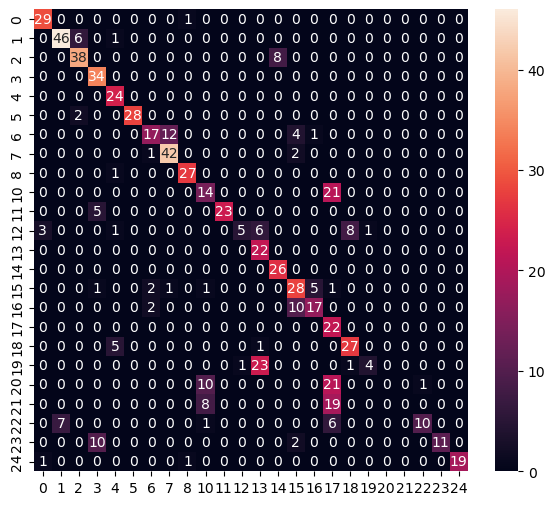

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.87      0.87      0.87        53
           2       0.83      0.83      0.83        46
           3       0.68      1.00      0.81        34
           4       0.75      1.00      0.86        24
           5       1.00      0.93      0.97        30
           6       0.77      0.50      0.61        34
           7       0.76      0.93      0.84        45
           8       0.93      0.96      0.95        28
          10       0.41      0.40      0.41        35
          11       1.00      0.82      0.90        28
          12       0.83      0.21      0.33        24
          13       0.42      1.00      0.59        22
          14       0.76      1.00      0.87        26
          15       0.61      0.72      0.66        39
          16       0.74      0.59      0.65        29
          17       0.24      1.00      0.39        22
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\lamba\AppData\Local\Temp\tmpl12cpsmb\assets


INFO:tensorflow:Assets written to: C:\Users\lamba\AppData\Local\Temp\tmpl12cpsmb\assets


7512

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 3.92 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4317650e-04 1.4968866e-01 1.0088292e-01 3.0780051e-05 1.2561153e-01
 5.1875430e-01 5.0269138e-12 4.3802583e-11 3.2134140e-03 3.1530103e-17
 9.8153204e-04 1.2912173e-05 2.6323670e-04 3.9468085e-07 3.2228883e-02
 1.2777028e-10 1.6283116e-09 3.0158574e-03 4.4671269e-03 8.2946741e-07
 3.0909118e-03 1.2000437e-03 5.5955335e-02 1.4795057e-07 3.5797077e-04
 1.2816323e-14]
5
